# Multiple Linear Regression



### Importing Needed packages


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

### Downloading Data


In [14]:
!wget -O 'FuelConsumption.csv' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2022-06-23 14:23:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.006s  

2022-06-23 14:23:49 (11.1 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

contains **model-specific fuel consumption ratings** & estimated carbon dioxide emissions

[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>


In [15]:
df = pd.read_csv('FuelConsumption.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


###DataSet Description

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [19]:
df.describe(include='all').style.background_gradient('Reds')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,nan,39,663,16,nan,nan,22,4,nan,nan,nan,nan,nan
top,nan,FORD,F150 FFV,MID-SIZE,nan,nan,A6,X,nan,nan,nan,nan,nan
freq,nan,90,8,178,nan,nan,222,514,nan,nan,nan,nan,nan
mean,2014.000000,nan,nan,nan,3.346298,5.794752,nan,nan,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.000000,nan,nan,nan,1.415895,1.797447,nan,nan,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.000000,nan,nan,nan,1.000000,3.000000,nan,nan,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.000000,nan,nan,nan,2.000000,4.000000,nan,nan,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.000000,nan,nan,nan,3.400000,6.000000,nan,nan,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.000000,nan,nan,nan,4.300000,8.000000,nan,nan,15.550000,10.850000,13.350000,31.000000,294.000000


Selecting features for regression.


In [22]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Let's plot Emission values with respect to ENGINESIZE , CYLINDERS & FUELCONSUMPTION_COMB:


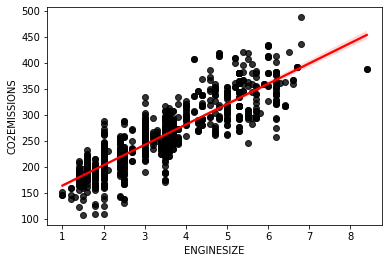

In [40]:
sns.regplot(data=df,y=df.CO2EMISSIONS,x=df.ENGINESIZE,scatter_kws={"color": "black"}, line_kws={"color": "red"})

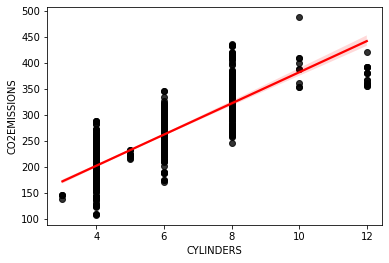

In [41]:
sns.regplot(data=df,y=df.CO2EMISSIONS,x=df.CYLINDERS,scatter_kws={"color": "black"}, line_kws={"color": "red"})

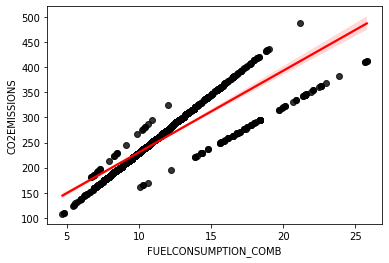

In [42]:
sns.regplot(data=df,y=df.CO2EMISSIONS,x=df.FUELCONSUMPTION_COMB,scatter_kws={"color": "black"}, line_kws={"color": "red"})

### Extracting X & Y Features

In [44]:
df.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [48]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']].values
X[0:5]

array([[ 2. ,  4. ,  8.5],
       [ 2.4,  4. ,  9.6],
       [ 1.5,  4. ,  5.9],
       [ 3.5,  6. , 11.1],
       [ 3.5,  6. , 10.6]])

In [49]:
Y = df[['CO2EMISSIONS']].values
Y[0:5]

array([[196],
       [221],
       [136],
       [255],
       [244]])

#### Train and test dataset


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)
#random state means on multiple (4) calls it should return same split data

#### Train data distribution


In [54]:
from sklearn import linear_model
MLinReg = linear_model.LinearRegression().fit(X_train, Y_train)

In [56]:
MLinReg.intercept_

array([65.2578757])

In [55]:
MLinReg.coef_

array([[10.24537129,  7.64355532,  9.68132732]])

<h2 id="prediction">Prediction</h2>


In [58]:
Y_hat= MLinReg.predict(X_test)
Y_hat[0:5]

array([[259.39421287],
       [216.04051098],
       [255.40887315],
       [261.21766954],
       [294.43880893]])

###Evaluation

In [67]:
# variance score (1 is perfect prediction )
MLinReg.score(X_test, Y_test)

0.8900230909702191

In [68]:
np.mean(Y_hat - Y_test)

-1.3757964363071293

In [69]:
#residual sum of squares
np.mean((Y_hat - Y_test) ** 2)

408.3755301363798

## Author

<a href="https://www.linkedin.com/in/swaroopnc/" target="_blank">Swaroop N C</a>